#Object Classifier CNN
This simple convolutional neural network will handle recognizing various common objects found in the world. Particularly, the following:
  * Airplane
  * Automobile
  * Bird
  * Cat
  * Deer
  * Dog
  * Frog
  * Horse
  * Ship
  * Truck 

In [4]:
# Get required imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## Loading and setting up the data
There is a dataset that comes with the Keras library that would suit our purposes very well here that includes the following class names.

Data processing for this dataset is very minimal.

In [6]:
#  Extract the trainining and test data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Convert the grayscale images from 0-255 to 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 12s 0us/step


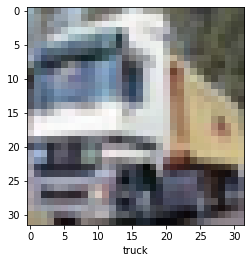

In [7]:
# Examine an image for reference
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.xlabel(CLASS_NAMES[train_labels[1][0]]) # It's a truck!
plt.show()

## Creating the CNN Model
We will add a stack of Conv2D and MaxPooling2D layers first.
These will then be flattened and connected to dense layers to extract the overall object type from the image.

First, the Conv layers will filter through the image to look for any potential patterns.

Then, this will be flattened and passed onto dense layers to overall piece together what object the image represents.

In [32]:
# Create the CNN model
model = models.Sequential()
# Input of 32 by 32 images with a depth of 3 with 32 filters of 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Pool with a stride of 2 and a size of 2 x 2
model.add(layers.MaxPooling2D((2, 2)))
# Double the filters as there is a smaller image now, so more computation available
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Now, add the flattening and the dense layers
# Note: with flattening the output shape is increased to 1024 outputs (32*32 pixels)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# The output dense layer with a output size of the number of classes (10 here)
model.add(layers.Dense(len(CLASS_NAMES)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

## Model training
We will be using the *adam* optimizer (for this simple neural network, it's perforamnce and memory efficiency are very good for the results it provides).

Similarly, the *SparseCategoricalCrossentropy* is also a computationally efficient algorithm and uses up less memory as opposed to its vector-based variants.

Currently, 4 epochs will be used for the model to find the right balance between underfitting and overfitting.

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4, 
                    validation_data=(test_images, test_labels))

Epoch 1/4
  34/1563 [..............................] - ETA: 59s - loss: 2.2749 - accuracy: 0.1241 

KeyboardInterrupt: ignored

## Evaluation
Looking at the neural network, it can be seen that we achieve an accuracy of around 67 to 69%. This can be expected at this stage of the development. Thus, in order to further optimize the test accuracy, we are going to employ some optimizations.

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Accuracy on test set: ", test_acc)

## Improving the algorithm

Currently only 50,000 examples are used. Image data augmentation can be used through Keras's ImageDataGenerator library to drastically increase the dataset.
Such a small dataset is the main problem for the low accuracy. However, by altering the image (rotation, flip, translation, etc.), much more data can be generated.